In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
column = ['车辆 id','上架时间','上架价格','价格调整时间：调整后价格','下架时间','成交时间']
df =  pd.read_table("2021年MathorCup大数据竞赛赛道A/附件/附件4：门店交易训练数据.txt",header=None,names = column,index_col=False)

In [9]:
def date2num(day):
    '''
    xxxx-xx-xx (y-m-d)/ xxxxxx(y m) to  num
    判断是否为nan，若不为nan则判断为xxxx-xx-xx的年月日形式或xxxxxx的月+日形式，计算距离2000年1月1日的日期差，若日期小于2000年本函数不适用
    （数据集中的日期全为2000年后）
    '''
    if pd.isna(day):
        return day
    else:
        day = str(day)
        if day[4] == '-':
            year = int((eval(day[:4])-2000))
            if day[5] == '0':
                month = int(eval(day[6:7]))
            if day[5] == '1':
                month = int(eval(day[5:7]))
            if day[8] == '0':
                days = int(eval(day[-1:]))
            else:
                days = int(eval(day[-2:]))
            return int(year*365 + (month-1)*30 + days)
        elif len(day)==8:
            year = int((eval(day[:4])-2000))
            if day[4] == '0':
                month = int(eval(day[5:6]))
            else:
                month = int(eval(day[4:6]))
            return int(year*365 + (month-1)*30)
        else:
            return 'error'

In [115]:
df

,车辆 id,上架时间,上架价格,价格调整时间：调整后价格,下架时间,成交时间,a,在售时间,成交周期,价格调整次数
0,68603,7736,3.9800,{},7736,7736.0,1,0,0.0,0.0
1,12312,7799,4.5000,{},7829,7829.0,1,30,30.0,0.0
2,57655,7738,23.9000,"[""2021-04-05"", ""23""]",7763,7763.0,1,25,25.0,1.0
3,45688,7541,20.5798,{},7544,7544.0,1,3,3.0,0.0
4,52081,7784,12.2800,"[""2021-05-20"", ""11.9""]",7836,7836.0,1,52,52.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,10177,7876,22.8800,{},7916,NaN,1,40,NaN,0.0
9996,54312,7747,12.3000,{},7771,NaN,1,24,NaN,0.0
9997,45597,7674,15.3800,{},7692,NaN,1,18,NaN,0.0
9998,38629,7822,36.8800,"[""2021-06-12"", ""36.6""]",7837,NaN,1,15,NaN,1.0


In [11]:
df['上架时间'] = df['上架时间'].apply(date2num)
df['下架时间'] = df['下架时间'].apply(date2num)
df['成交时间'] = df['成交时间'].apply(date2num)

In [51]:
df['在售时间'] = df['下架时间'] - df['上架时间']
df['成交周期'] = df['成交时间'] - df['上架时间']

In [121]:
dic_len = np.zeros((len(df),1))
low_price = np.zeros((len(df),1))
for i in range(len(df)):
    if bool(eval(df['价格调整时间：调整后价格'][i])):
        dic = eval(df['价格调整时间：调整后价格'][i])
        strr = df['价格调整时间：调整后价格'][i]
        strr = strr.replace('{','[')
        strr = strr.replace('}',']')
        strr = strr.replace(':',',')
        df['价格调整时间：调整后价格'][i] = strr
        dic_len[i] = len(dic)
        low_price[i] = float(df['上架价格'][i]) - float(eval(strr)[-1])
df['价格调整次数'] = dic_len
df['降价金额'] = low_price

C:\Users\kiko\AppData\Local\Temp/ipykernel_13120/2845169388.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['价格调整时间：调整后价格'][i] = strr


In [122]:
df

,车辆 id,上架时间,上架价格,价格调整时间：调整后价格,下架时间,成交时间,a,在售时间,成交周期,价格调整次数,降价金额
0,68603,7736,3.9800,{},7736,7736.0,1,0,0.0,0.0,0.00
1,12312,7799,4.5000,{},7829,7829.0,1,30,30.0,0.0,0.00
2,57655,7738,23.9000,"[""2021-04-05"", ""23""]",7763,7763.0,1,25,25.0,2.0,0.90
3,45688,7541,20.5798,{},7544,7544.0,1,3,3.0,0.0,0.00
4,52081,7784,12.2800,"[""2021-05-20"", ""11.9""]",7836,7836.0,1,52,52.0,2.0,0.38
...,...,...,...,...,...,...,...,...,...,...,...
9995,10177,7876,22.8800,{},7916,NaN,1,40,NaN,0.0,0.00
9996,54312,7747,12.3000,{},7771,NaN,1,24,NaN,0.0,0.00
9997,45597,7674,15.3800,{},7692,NaN,1,18,NaN,0.0,0.00
9998,38629,7822,36.8800,"[""2021-06-12"", ""36.6""]",7837,NaN,1,15,NaN,2.0,0.28


In [103]:
dicc = {"2021-03-08": "38.6", "2021-03-27": "38"}
dicc.keys()

dict_keys(['2021-03-08', '2021-03-27'])

12.0

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    2
Name: 价格调整次数, Length: 10000, dtype: int64

In [68]:
max(dic_len)

12

In [52]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [83]:
df

,车辆 id,上架时间,上架价格,价格调整时间：调整后价格,下架时间,成交时间,a,在售时间,成交周期,价格调整次数
0,68603,7736,3.9800,{},7736,7736.0,1,0,0.0,0.0
1,12312,7799,4.5000,{},7829,7829.0,1,30,30.0,0.0
2,57655,7738,23.9000,"{""2021-04-05"": ""23""}",7763,7763.0,1,25,25.0,1.0
3,45688,7541,20.5798,{},7544,7544.0,1,3,3.0,0.0
4,52081,7784,12.2800,"{""2021-05-20"": ""11.9""}",7836,7836.0,1,52,52.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,10177,7876,22.8800,{},7916,NaN,1,40,NaN,0.0
9996,54312,7747,12.3000,{},7771,NaN,1,24,NaN,0.0
9997,45597,7674,15.3800,{},7692,NaN,1,18,NaN,0.0
9998,38629,7822,36.8800,"{""2021-06-12"": ""36.6""}",7837,NaN,1,15,NaN,1.0


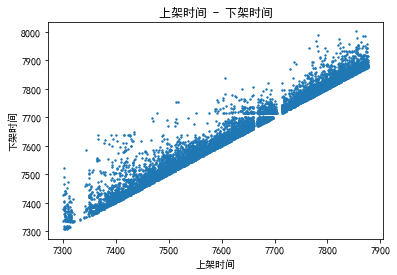

In [54]:
plt.scatter(df[column[1]],df[column[4]],s=2)
plt.xlabel(column[1])
plt.ylabel(column[4])
plt.title(column[1]+' - '+column[4])
plt.show()

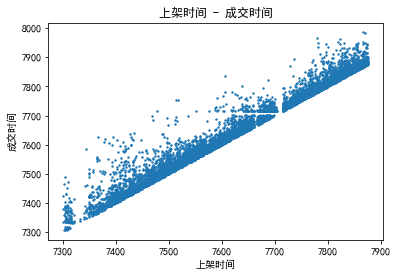

In [55]:
plt.scatter(df[column[1]],df[column[5]],s=2)
plt.xlabel(column[1])
plt.ylabel(column[5])
plt.title(column[1]+' - '+column[5])
plt.show()

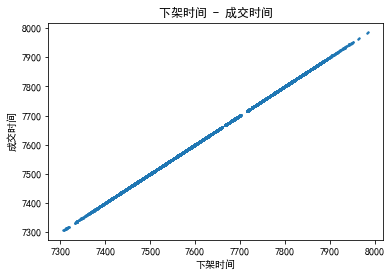

In [56]:
plt.scatter(df[column[4]],df[column[5]],s=2)
plt.xlabel(column[4])
plt.ylabel(column[5])
plt.title(column[4]+' - '+column[5])
plt.show()

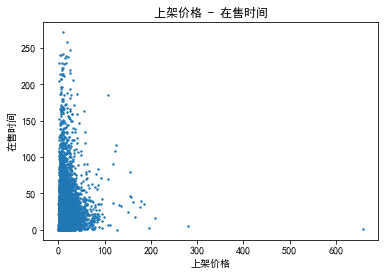

In [57]:
plt.scatter(df[column[2]],df['在售时间'],s=2)
plt.xlabel(column[2])
plt.ylabel('在售时间')
plt.title(column[2]+' - '+'在售时间')
plt.show()

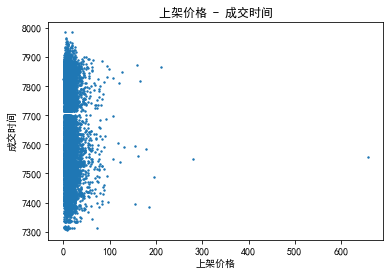

In [58]:
plt.scatter(df[column[2]],df['成交时间'],s=2)
plt.xlabel(column[2])
plt.ylabel('成交时间')
plt.title(column[2]+' - '+'成交时间')
plt.show()

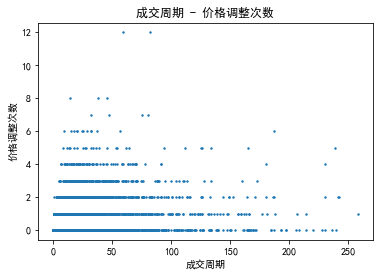

In [85]:
plt.scatter(df['成交周期'],df['价格调整次数'],s=2)
plt.xlabel('成交周期')
plt.ylabel('价格调整次数')
plt.title('成交周期'+' - '+'价格调整次数')
plt.show()

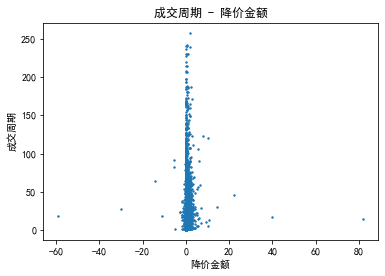

In [124]:
plt.scatter(df['降价金额'],df['成交周期'],s=2)
plt.xlabel('降价金额')
plt.ylabel('成交周期')
plt.title('成交周期'+' - '+'降价金额')
plt.show()